11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shapes: (52800, 28, 28, 1) (7200, 28, 28, 1) (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/5
413/413 - 107s - 259ms/step - accuracy: 0.9189 - loss: 0.2669 - val_accuracy: 0.0988 - val_loss: 10.0473 - learning_rate: 1.0000e-03
Epoch 2/5
413/413 - 141s - 342ms/step - accuracy: 0.9745 - loss: 0.0841 - val_accuracy: 0.9671 - val_loss: 0.0986 - learning_rate: 1.0000e-03
Epoch 3/5
413/413 - 141s - 342ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.9699 - val_loss: 0.0988 - learning_rate: 1.0000e-03
Epoch 4/5
413/413 - 141s - 341ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9858 - val_loss: 0.0485 - learning_rate: 1.0000e-03
Epoch 5/5
413/413 - 145s - 350ms/step - accuracy: 0.9859 - loss: 0.0448 - val_accuracy: 0.9811 - val_loss: 0.0663 - learning_rate: 1.0000e-03

Test accuracy: 0.9871  —  Test loss: 0.0396
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


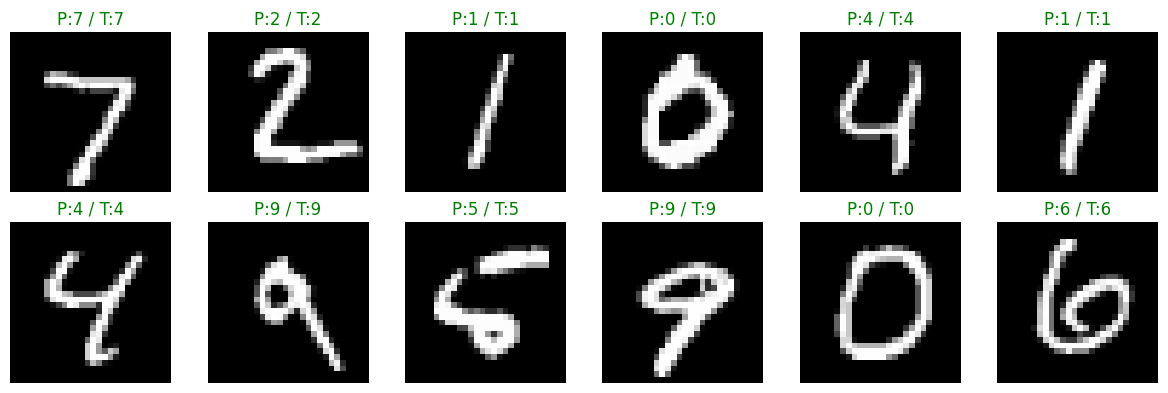

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted: 9  probs: [0.    0.    0.001 0.    0.006 0.    0.    0.    0.003 0.989]


In [ ]:
# mnist_cnn.py
# Handwritten digit recognition on MNIST using TensorFlow / Keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, utils, optimizers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# 1) Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # images: (28,28), labels: 0-9

# 2) Preprocess
# - expand channel dim
x_train = np.expand_dims(x_train, -1).astype("float32")
x_test  = np.expand_dims(x_test, -1).astype("float32")

# - normalize to [0,1]
x_train /= 255.0
x_test  /= 255.0

# - one-hot labels
num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat  = utils.to_categorical(y_test, num_classes)

# - split training into train + validation
x_train_main, x_val, y_train_main, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.12, random_state=42, stratify=y_train
)

print("Shapes:", x_train_main.shape, x_val.shape, x_test.shape)

# 3) Build a simple CNN
def build_model(input_shape=(28,28,1), num_classes=10):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128, (3,3), activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs=inp, outputs=out)
    return model

model = build_model()
model.summary()

# 4) Compile
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 5) Callbacks
es = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# 6) Train
history = model.fit(
    x_train_main, y_train_main,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=128,
    callbacks=[es, rlr],
    verbose=2
)

# 7) Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  —  Test loss: {test_loss:.4f}")

# 9) Predict some samples and plot
def show_predictions(model, x, y_true, n=12):
    preds = model.predict(x[:n])
    pred_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(y_true[:n], axis=1) if y_true.ndim > 1 else y_true[:n]

    plt.figure(figsize=(12,4))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(x[i].squeeze(), cmap="gray")
        col = "green" if pred_labels[i] == true_labels[i] else "red"
        plt.title(f"P:{pred_labels[i]} / T:{true_labels[i]}", color=col)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test_cat, n=12)

# 10) Example: predict single image (modify index as needed)
idx = 7
img = x_test[idx:idx+1]  # shape (1,28,28,1)
pred = model.predict(img)
print("Predicted:", np.argmax(pred), " probs:", np.round(pred.ravel(), 3))

Enter a digit (0-9): 2


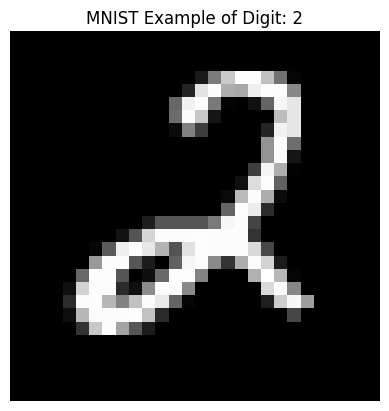

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train + test for easier lookup
images = np.concatenate([x_train, x_test])
labels = np.concatenate([y_train, y_test])

# Ask user for a digit
digit = int(input("Enter a digit (0-9): "))

# Find all images of this digit
indices = np.where(labels == digit)[0]

if len(indices) == 0:
    print("No images found for this digit.")
else:
    # Pick a random image of that digit
    idx = np.random.choice(indices)
    img = images[idx]

    # Show the image
    plt.imshow(img, cmap='gray')
    plt.title(f"MNIST Example of Digit: {digit}")
    plt.axis("off")
    plt.show()

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from PIL import Image
import os

MODEL = "mnist.h5"

# ---- Load or train model ----
if os.path.exists(MODEL):
    model = tf.keras.models.load_model(MODEL)
else:
    (x_train, y_train), _ = mnist.load_data()
    x_train = x_train[..., None] / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation="relu"),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=2)
    model.save(MODEL)

# ---- Function to predict ----
def predict_number(img_path):
    img = Image.open(img_path).convert("L").resize((28,28))
    arr = 1 - (np.array(img)/255.0)         # invert for MNIST style
    arr = arr.reshape(1,28,28,1)
    prob = model.predict(arr)[0]
    digit = np.argmax(prob)
    print("\nPredicted Number:", digit)
    print("Confidence:", round(float(prob[digit]),4))

# ---- Ask user for image path ----
path = input("\nEnter image path: ")
predict_number(path)



Enter image path: sample_image.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Predicted Number: 8
Confidence: 1.0
